<a href="https://colab.research.google.com/github/Sanatan-Shrivastava/cs6320_nlp_g22/blob/main/cs6320_nlp_g22_a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ls

sample_data


In [2]:
import string

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/CS6320NLP/Dataset
!ls

/content/drive/MyDrive/CS6320NLP/Dataset
train.txt  val.txt


In [5]:
def removeChar(token):
      tk = "".join([x for x in token if x not in string.punctuation])
      return tk.lower()

In [6]:
# Sample code for data preprocessing
with open("train.txt", "r") as file:
    text = file.read()

# Tokenize the text into words
tokens_old = text.split()
tokens = [removeChar(x) for x in tokens_old]
tokens = [x for x in tokens if x != '']

# Build unigram and bigram counts
unigram_counts = {}
bigram_counts = {}

for i in range(len(tokens) - 1):
    word = tokens[i]
    next_word = tokens[i + 1]

    # Update unigram counts
    if word in unigram_counts:
        unigram_counts[word] += 1
    else:
        unigram_counts[word] = 1

    # Update bigram counts
    if (word, next_word) in bigram_counts:
        bigram_counts[(word, next_word)] += 1
    else:
        bigram_counts[(word, next_word)] = 1

print("unigram: ", unigram_counts)
print("bigram: ", bigram_counts)


unigram:  {'i': 1711, 'booked': 86, 'two': 128, 'rooms': 202, 'four': 20, 'months': 8, 'in': 1260, 'advance': 7, 'at': 745, 'the': 5302, 'talbott': 28, 'we': 1117, 'were': 578, 'placed': 8, 'on': 640, 'top': 40, 'floor': 137, 'next': 107, 'to': 2090, 'elevators': 32, 'which': 176, 'are': 310, 'used': 35, 'all': 278, 'night': 199, 'long': 39, 'when': 273, 'speaking': 3, 'front': 126, 'desk': 159, 'was': 1826, 'told': 77, 'that': 696, 'they': 490, 'simply': 19, 'honoring': 1, 'my': 532, 'request': 21, 'for': 1026, 'an': 224, 'upper': 6, 'had': 540, 'requested': 34, 'a': 2247, 'better': 91, 'view': 105, 'am': 69, 'looking': 43, 'brick': 6, 'wall': 30, 'and': 2593, 'getting': 28, 'no': 257, 'sleep': 28, 'he': 84, 'also': 144, 'me': 247, 'received': 20, 'complaints': 12, 'before': 66, 'from': 365, 'guests': 53, '16th': 2, 'aware': 9, 'of': 1046, 'noise': 29, 'problem': 38, 'why': 28, 'then': 77, 'did': 247, 'place': 90, 'us': 215, 'this': 594, 'hotel': 1036, 'is': 837, 'not': 614, 'totally'

In [7]:
# Calculate unsmoothed unigram probabilities
total_tokens = len(tokens)
unigram_probabilities = {word: count / total_tokens for word, count in unigram_counts.items()}

# Calculate unsmoothed bigram probabilities
bigram_probabilities = {(word1, word2): count / unigram_counts[word1] for (word1, word2), count in bigram_counts.items()}

print("unigram probabilities: ", unigram_probabilities)
print("bigram probabilities: ", bigram_probabilities)

unigram probabilities:  {'i': 0.02154938979080341, 'booked': 0.0010831370672174712, 'two': 0.0016121109837655386, 'rooms': 0.0025441126462549908, 'four': 0.00025189234121336543, 'months': 0.00010075693648534616, 'in': 0.01586921749644202, 'advance': 8.81623194246779e-05, 'at': 0.009382989710197862, 'the': 0.06677665965566316, 'talbott': 0.0003526492776987116, 'we': 0.014068187256766458, 'were': 0.00727968866106626, 'placed': 0.00010075693648534616, 'on': 0.008060554918827694, 'top': 0.0005037846824267309, 'floor': 0.001725462537311553, 'next': 0.001347624025491505, 'to': 0.026322749656796686, 'elevators': 0.00040302774594138465, 'which': 0.0022166526026776157, 'are': 0.003904331288807164, 'used': 0.00044081159712338946, 'all': 0.003501303542865779, 'night': 0.0025063287950729857, 'long': 0.0004911900653660626, 'when': 0.003438330457562438, 'speaking': 3.778385118200481e-05, 'front': 0.001586921749644202, 'desk': 0.002002544112646255, 'was': 0.022997770752780262, 'told': 0.0009697855136

In [8]:
def laplace_smoothing(unigram_counts, vocabulary_size, k=1):
    smoothed_probabilities = {}
    total_tokens = sum(unigram_counts.values())

    for word, count in unigram_counts.items():
        smoothed_probabilities[word] = (count + k) / (total_tokens + k * vocabulary_size)

    return smoothed_probabilities


In [9]:
def laplace_smoothing_bigram(unigram_counts, bigram_counts, k=1):
      smoothed_probabilities = {}
      for (w1, w2), count in bigram_counts.items():
        smoothed_probabilities[(w1, w2)] = (count + k) / (unigram_counts[w1] + k*len(bigram_counts))
      return smoothed_probabilities

In [10]:
import math
def calculate_perplexity(validation_text, ngram_probabilities, n, k, unigram_counts):
    #ngram_probability is a dictionary of probabilites computed from the training dataset
    tokens_old = validation_text.split()
    tokens = [removeChar(x) for x in tokens_old]
    tokens = [x for x in tokens if x != '']
    perplexity = 0
    N = len(tokens)

    for i in range(n - 1, N):
        #extracting tokens based on n (n=1 for unigram, n=2 for bigram)
        ngram = tuple(tokens[i - n + 1 : i + 1])
        if ngram in ngram_probabilities:
            ngram_prob = ngram_probabilities[ngram]
        else:
            # Use a fallback probability for unknown n-grams
            if n==1:
               ngram_prob = k/(sum(unigram_counts.values())+k*N)
            elif n==2 and ngram[0] in unigram_counts:
              prev = ngram[0]
              ngram_prob = k/(unigram_counts[prev] + k*N)
            else:
              ngram_prob = 1/N
        perplexity -= math.log2(ngram_prob)
    perplexity = math.exp(perplexity / N)
    return perplexity

# Example usage:
with open("/content/drive/MyDrive/A1_DATASET/val.txt", "r") as file:
    validation_text = file.read()

In [11]:
# Calculate perplexity for unigram model with Laplace smoothing (k=1)
vocabulary_size = len(unigram_counts)
smoothed_unigram_probabilities = laplace_smoothing(unigram_counts, vocabulary_size, k=1)
unigram_perplexity = calculate_perplexity(validation_text, smoothed_unigram_probabilities, 1, 1, unigram_counts)
print("Unigram Perplexity:", unigram_perplexity)

Unigram Perplexity: 13616669.121676987


In [12]:
# Calculate perplexity for unigram model with Laplace smoothing (k=2)
smoothed_bigram_probabilities = laplace_smoothing_bigram(unigram_counts, bigram_counts, 1)
bigram_perplexity = calculate_perplexity(validation_text, smoothed_bigram_probabilities, 2, 1, unigram_counts)
print("Bigram Perplexity:", bigram_perplexity)

Bigram Perplexity: 180833.81207186953


In [13]:
k = [1,2,3,4]
perp_unigram, perp_bigram = [],[]
for i in range(len(k)):
  smoothed_unigram_probabilities = laplace_smoothing(unigram_counts, len(unigram_counts), k[i])
  unigram_perplexity = calculate_perplexity(validation_text, smoothed_unigram_probabilities, 1, 1, unigram_counts)
  perp_unigram.append(unigram_perplexity)
  print("for k =", str(k[i])+"," ,"unigram perpexility is", perp_unigram[i])
  smoothed_bigram_probabilities = laplace_smoothing_bigram(unigram_counts, bigram_counts, k[i])
  bigram_perplexity = calculate_perplexity(validation_text, smoothed_bigram_probabilities, 2, 1, unigram_counts)
  perp_bigram.append(bigram_perplexity)
  print("for k =", str(k[i])+"," ,"bigram perpexility is", perp_bigram[i])
  print("---")

for k = 1, unigram perpexility is 13616669.121676987
for k = 1, bigram perpexility is 180833.81207186953
---
for k = 2, unigram perpexility is 13616669.121676987
for k = 2, bigram perpexility is 297291.06531961076
---
for k = 3, unigram perpexility is 13616669.121676987
for k = 3, bigram perpexility is 387943.8175907893
---
for k = 4, unigram perpexility is 13616669.121676987
for k = 4, bigram perpexility is 462606.23768245155
---


Text(0, 0.5, 'perplexity')

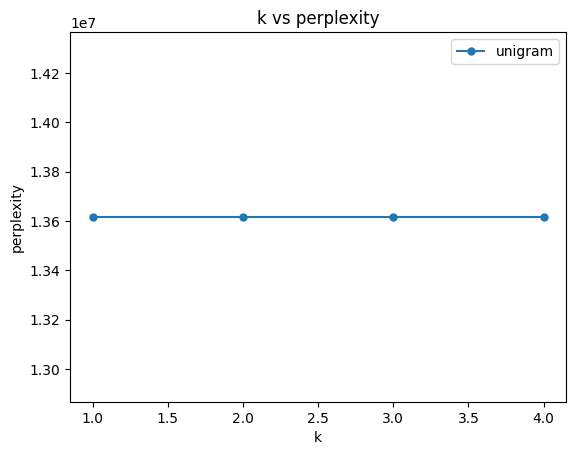

In [14]:
import matplotlib.pyplot as plt
import string

plt.plot(k, perp_unigram, marker = '.', markersize = 10, label="unigram")
plt.legend()
plt.title("k vs perplexity")
plt.xlabel("k")
plt.ylabel("perplexity")

Text(0, 0.5, 'perplexity')

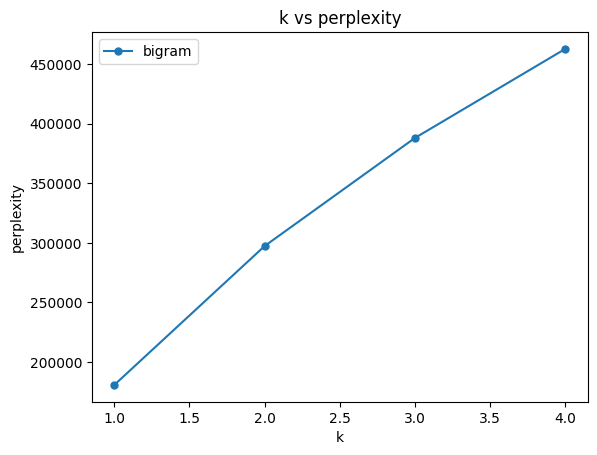

In [15]:
import matplotlib.pyplot as plt
import string

plt.plot(k, perp_bigram, marker = '.', markersize = 10, label="bigram")
plt.legend()
plt.title("k vs perplexity")
plt.xlabel("k")
plt.ylabel("perplexity")